## Project Mobile Price Classification 

## GOAL 
Find the best machine learning model/method for our dataset
<br/>
## Executive Summary
This is a mobile price classification dataset from Kaggle. The reason that I choose this dataset is that it is a supervised learning problem. We are examing machine learning algorithms on the mobile dataset to predict the mobile price and decided which model is the best one for this dataset. <br/>

we will be using three methods<br/>
### "i":  Classifier methods <br/>
### "ii": Ensemble method  <br/>
### "iii":Deep learning, neural network method

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#ml libary
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

#classifier libaries
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import pandas
from sklearn.svm import SVC
import sklearn
import pandas 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

#tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

## Data Understanding

2000 rows, and 21 features <br/>
We have features like mobile's battery power,mobile weight,mobile cores and etc to predict the target "price_range"<br/>
No null value

In [1]:
df = pd.read_csv(r'C:\Users\Guanyu\Desktop\Zhou-2021Fall-Courses\2022 Spring DSCI-6003-01Machine learning\HW\Final Project\train.csv')
print(df.info())
print(df.isnull().sum().count())
df.tail()

[MLENS] backend: threading


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Exploratory Data Analysis


There is no outlier in our predcition target

<AxesSubplot:xlabel='price_range'>

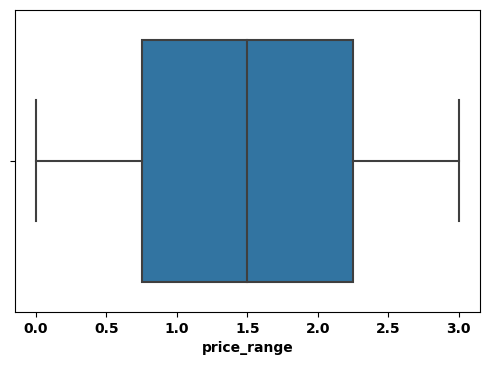

In [2]:
#prediction target outlier detection
plt.figure(dpi=100)
sns.boxplot(data=df, x='price_range')

Our "Price_range" prediction target has four classifications and they are equally distributed. <br/>
we have a balanced dataset.

In [3]:
##prediction target 
df_price_rage = df.iloc[: , -1:]
df_price_rage.value_counts()

price_range
0              500
1              500
2              500
3              500
dtype: int64

## Preprocessing

#### (1)check if the data is balanced distributed and decide if we need to scale the data <br/>

Below picutres showing our features are balanced distributed and no need to scale our data

(0.0, 20.0)

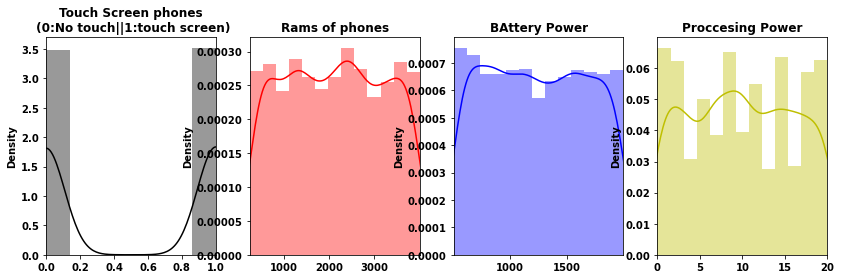

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(14,4))

touch_screen = df['touch_screen'].values
ram= df['ram'].values
battery_power =df['battery_power'].values
proccesing_power = df['pc'].values

sns.distplot(touch_screen,ax=ax[0],color='black')
ax[0].set_title('Touch Screen phones\n (0:No touch||1:touch screen)',fontsize=12)
ax[0].set_xlim([min(touch_screen),max(touch_screen)])

sns.distplot(ram,ax=ax[1],color='r')
ax[1].set_title('Rams of phones',fontsize=12)
ax[1].set_xlim([min(ram),max(ram)])

sns.distplot(battery_power,ax=ax[2],color='b')
ax[2].set_title('BAttery Power',fontsize=12)
ax[2].set_xlim([min(battery_power ),max(battery_power )])

sns.distplot(proccesing_power ,ax=ax[3],color='y')
ax[3].set_title('Proccesing Power',fontsize=12)
ax[3].set_xlim([min(proccesing_power ),max(proccesing_power )])

#### (2)Split the data

In [5]:
X = df.drop(columns='price_range')
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=555, stratify=y)

## Models deployment and Cross Validation
we will be using three methods<br/>
### "i":  Classifier methods <br/>
### "ii": Ensemble method  <br/>
### "iii":Deep learning, neural network method

"------------------Starting here-------------------------"<br/>
#### i:Classifier methods<br/>
'Logistic Regression','Random Forest','Support Vector Machine', 'KNeighbors','Decision Tree','Ada Boost','Bagging','Gradient Boosting', 'XGBoost'

Support Vector Machine is the best model with highest test accuracy in our data set: 0.9575 

In [6]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')

clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.759 (+/- 0.021) [Logistic Regression]
Test Accuracy: 0.7675 
Train CV Accuracy: 0.870 (+/- 0.011) [Random Forest]
Test Accuracy: 0.8825 
Train CV Accuracy: 0.949 (+/- 0.014) [Support Vector Machine]
Test Accuracy: 0.9575 
Train CV Accuracy: 0.918 (+/- 0.011) [KNeighbors]
Test Accuracy: 0.9175 
Train CV Accuracy: 0.836 (+/- 0.011) [Decision Tree]
Test Accuracy: 0.8375 
Train CV Accuracy: 0.704 (+/- 0.048) [Ada Boost]
Test Accuracy: 0.6900 
Train CV Accuracy: 0.884 (+/- 0.018) [Bagging]
Test Accuracy: 0.8925 
Train CV Accuracy: 0.896 (+/- 0.019) [Gradient Boosting]
Test Accuracy: 0.9000 
Train CV Accuracy: 0.912 (+/- 0.012) [XGBoost]
Test Accuracy: 0.9050 
Wall time: 52.5 s


#### ii.Ensembles <br/>
ML-Ensemble library to combine my best model and my second best model into a single layer.<br/>
My best model:SVM <br/>
MY second best model:KNeighbors<br/>
My Ensemble meta:GradientBoostingClassifier
    
I use GradientBoostingClassifier meta to combine group of my best models to create a strong predictive model.<br/>
My ML-Ensemble method test accuracy is: 0.9525

In [8]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble.add([SVM, KNC])
# Attach the final meta estimator
# ensemble.add_meta(LogisticRegression())
ensemble.add_meta(GradientBoostingClassifier())
# Fit ensemble
ensemble.fit(X_train, y_train)
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), y_test))


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.954375

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9525


In [9]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                 score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  kneighborsclassifier       0.92     0.00  0.01  0.00  0.08  0.00
layer-1  svc                        0.94     0.00  0.09  0.00  0.05  0.00



#### iii.Building Neural network using Tensorflow

(1)Preprocessing: convert data fram to numpy array for later use <br/>
(2)setting up dense layer,construct neural network<br/>
(3)Compile model<br/>
(4)Run model<br/>
(5)Cross validation<br/>  

#### (1) Preprocessing
1:convert data from to numpy array and scaler it(Normalize data) for later use <br/>
2.conver our prediction target using oneHotEncoder since it has four classes(0,1,2,3,4) for later use. <br/>
One hot encoded array: <br/>
[[0. 1. 0. 0.] <br/>
 [0. 0. 1. 0.] <br/>
 [0. 0. 1. 0.] <br/>
 [0. 0. 1. 0.] <br/>
 [0. 1. 0. 0.]] <br/>

In [10]:
#Changing X pandas dataframe to numpy array
X = df.iloc[:,:20].values

#normalized X data
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


In [11]:
#Changing Y pandas dataframe to numpy array
y = df.iloc[:,20:21].values

#prediction target 
#new arry = shape (n, number of classes)
# n is number of samples
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded Y array:',y)

One hot encoded Y array: [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


#### (2)setting up dense layer,constructing neural network<br/>
1.Model.add is to add layer to our network , Dense means fully connected layer <br/>

2.First layer: Output  16 dimensions, while input is 20 dimentions, activation function relu in our case <br/>

3.Second layer:Output 12 dimensions, while automatically considerthe same from last layer, activation function relu in our case <br/>

4.Last layer:  Output 4  dimensions, because we have 4 different classes in our target. the output layer takes all activation functions from previous layer, the softmax take negative/positve/etc numbers and transforms them into values between 0 and 1

In [12]:
#train test split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

#### (3)Compile model

In [ ]:
#complie model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### (4)Run model

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 769us/step - loss: 1.5331 - accuracy: 0.2322
Epoch 2/100
29/29 [==============================] - 0s 708us/step - loss: 1.4422 - accuracy: 0.2622
Epoch 3/100
29/29 [==============================] - 0s 769us/step - loss: 1.3915 - accuracy: 0.2956
Epoch 4/100
29/29 [==============================] - 0s 739us/step - loss: 1.3511 - accuracy: 0.3394
Epoch 5/100
29/29 [==============================] - 0s 646us/step - loss: 1.3067 - accuracy: 0.3950
Epoch 6/100
29/29 [==============================] - 0s 677us/step - loss: 1.2561 - accuracy: 0.4489
Epoch 7/100
29/29 [==============================] - 0s 677us/step - loss: 1.1985 - accuracy: 0.4911
Epoch 8/100
29/29 [==============================] - 0s 831us/step - loss: 1.1323 - accuracy: 0.5439
Epoch 9/100
29/29 [==============================] - 0s 769us/step - loss: 1.0580 - accuracy: 0.5800
Epoch 10/100
29/29 [==============================] - 0s 800us/step - loss: 0.9815 - accura

#### (5)Cross validation

In [18]:
#cross validation our model on test data
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [19]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 91.0


In [20]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
#Re initialized to delete trained weights
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 1.4563 - accuracy: 0.2556 - val_loss: 1.4313 - val_accuracy: 0.2350
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.3139 - val_loss: 1.3813 - val_accuracy: 0.2800
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 1.3366 - accuracy: 0.3833 - val_loss: 1.3357 - val_accuracy: 0.3250
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2883 - accuracy: 0.4317 - val_loss: 1.2878 - val_accuracy: 0.3950
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2320 - accuracy: 0.4767 - val_loss: 1.2292 - val_accuracy: 0.4300
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1635 - accuracy: 0.5211 - val_loss: 1.1594 - val_accuracy: 0.4850
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 1.0839 - accuracy: 0.5567 - val_loss: 1.0818 - val_accuracy: 0.5250
Epoch 8/100
2

#### Visulaize

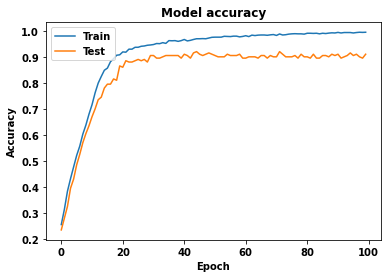

In [21]:
# epoch and accruacy
#plot to compare train accruacy and test accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

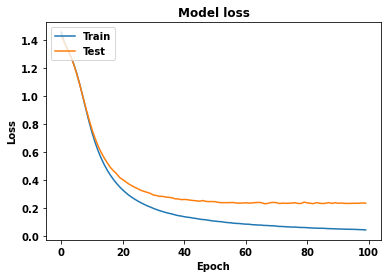

In [22]:
# epoch and loss
#plot to compare train lost and test lost
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Conclusion

The goal of this machine learning algorithm research is to find the best model/method to predict this dataset. As listed below of our result of examined methods, the best model for our dataset support vector machine classifier with the highest test 
#### "i":  Classifier methods: The best model we find is"support vector machine", Test Accuracy: 0.9575  <br/>
#### "ii": Ensemble method : We are using the best 2 models from classifier methods we found,SVM+KNN, Test Accuracy: 0.9525<br/>
#### "iii":Deep Learning, Neural Network method: Test Accuracy:0.9100